In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
train_data = pd.read_csv("train.csv", index_col=0)
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info

<bound method DataFrame.info of              Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   
11                  1       3   
12                  1       1   
13                  0       3   
14                  0       3   
15                  0       3   
16                  1       2   
17                  0       3   
18                  1       2   
19                  0       3   
20                  1       3   
21                  0       2   
22                  1       2   
23                  1       3   
24                  1       1   
25                  0       3   
26                  1       3   
27                  0       3   
28         

In [9]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
train_data.shape

(891, 11)

In [12]:
#删除缺失值过多的列，和观察判断来说和预测的y没有关系的列

train_data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

#处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法

train_data["Age"] = train_data["Age"].fillna(train_data["Age"].mean())
train_data = train_data.dropna()

In [13]:
train_data.shape

(889, 8)

In [14]:
#将分类变量转换为数值型变量

#将二分类变量转换为数值型变量
#astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这
#个方式可以很便捷地将二分类特征转换为0~1
train_data["Sex"] = (train_data["Sex"]== "male").astype("int")
train_data.head()

D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [16]:
#将三分类变量转换为数值型变量
labels = train_data["Embarked"].unique().tolist()
labels

['S', 'C', 'Q']

In [17]:
train_data["Embarked"] = train_data["Embarked"].apply(lambda x: labels.index(x))
train_data.head()

D:\soft\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [19]:
#提取标签和特征矩阵，分测试集和训练集
X = train_data.iloc[:,train_data.columns != "Survived"]
y = train_data.iloc[:,train_data.columns == "Survived"]

In [20]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)

In [21]:
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
619,2,0,4.0,2,1,39.0000,0
143,3,0,24.0,1,0,15.8500,0
136,2,1,23.0,0,0,15.0458,1
183,3,1,9.0,4,2,31.3875,0
238,2,0,8.0,0,2,26.2500,0


In [23]:
Xtrain.shape[0]

622

In [22]:
#修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])
    
#查看分好的训练集和测试集
Xtrain.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,4.0,2,1,39.0000,0
1,3,0,24.0,1,0,15.8500,0
2,2,1,23.0,0,0,15.0458,1
3,3,1,9.0,4,2,31.3875,0
4,2,0,8.0,0,2,26.2500,0


In [35]:
Xtest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,29.699118,0,0,7.7500,2
1,1,1,29.699118,0,0,29.7000,1
2,3,1,29.699118,0,0,7.7750,0
3,3,1,21.000000,0,0,7.7958,0
4,3,0,39.000000,0,5,29.1250,2


In [24]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)
score_

0.8052434456928839

In [25]:
score = cross_val_score(clf,X,y,cv=10).mean()
score

0.7739274770173645

0.8177860061287026


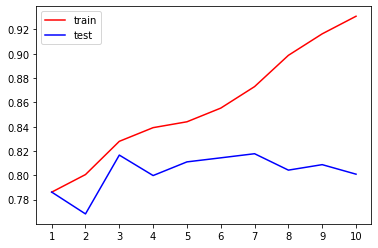

In [27]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                ,max_depth=i+1
                                ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [29]:
#用网格搜索调整参数
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)
parameters = {'splitter':('best','random')
            ,'criterion':("gini","entropy")
            ,"max_depth":[*range(1,10)]
            ,'min_samples_leaf':[*range(1,50,5)]
            ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
            }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

D:\soft\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=25,
                                              splitter='best'),
             iid='warn', n_...
                                                   0.23684210526315788,
                                                   0.2631578947368421,
 

In [30]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 6,
 'splitter': 'best'}

In [31]:
GS.best_score_

0.8279742765273312

In [32]:
clf = DecisionTreeClassifier(random_state=25
                             ,criterion="gini"
                             ,max_depth=8
                             ,min_impurity_decrease=0.0
                             ,min_samples_leaf=6
                             ,splitter="best"
                            )
clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.850187265917603

In [33]:
clf.predict(Xtest)

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [34]:
Xtest.shape

(267, 7)